DRY BEAN CLASS PREDICTION

Importing Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#ml specific imports 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Algorithm 
# Linear 
from sklearn.linear_model import LogisticRegression
# Tree Classification 
from sklearn.tree import DecisionTreeClassifier
# neighbour classicifation 
from sklearn.neighbors import KNeighborsClassifier
# naive bayes classification 
from sklearn.naive_bayes import GaussianNB
# svm
from sklearn.svm import SVC
#Ensemble classicification
from sklearn.ensemble import RandomForestClassifier


In [19]:
#Load the data and explore it 
df = pd.read_csv('../data/Dry_Bean_Dataset.csv')

df


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

make the target column as nuemrical

In [21]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(df['Class'])

Get all features

In [22]:
X = df.drop('Class', axis=1) #Features 

#Pipeline for prediction 

In [23]:
# 1. Logistic Algorithm 

from sklearn.pipeline import  Pipeline
from sklearn.feature_selection import SelectKBest, chi2

k = 10 

# Logistic Regrassion 
clf1 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', LogisticRegression(solver='saga'))
])


# Decision tree

clf2 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', DecisionTreeClassifier())
])

# Nearest Neighbours 
clf3 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', KNeighborsClassifier())
])

# Gausion Naive Bayes 
clf4 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', GaussianNB())
])

#Support Vector Machine 
clf5 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', SVC())
])

#Ensemble classicification
clf6 = Pipeline([
    ('feature_selection', SelectKBest(chi2, k=k)),
    ('classification', RandomForestClassifier())
])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
#train the model
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

c:\Users\public\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectKBest(score_func=<function chi2 at 0x00000241302AEE50>)),
                ('classification', RandomForestClassifier())])

In [27]:
ypred1 = clf1.predict(X_test)
ypred2 = clf2.predict(X_test)
ypred3 = clf3.predict(X_test)
ypred4 = clf4.predict(X_test)
ypred5 = clf5.predict(X_test)
ypred6 = clf6.predict(X_test)

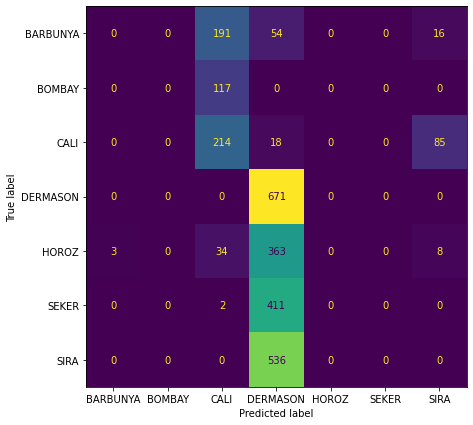

In [30]:
#confusion matrix
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred1),
    display_labels= enc.classes_
).plot(ax=ax, colorbar=False)

In [31]:
print(classification_report(y_test, ypred1, target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       261
      BOMBAY       0.00      0.00      0.00       117
        CALI       0.38      0.68      0.49       317
    DERMASON       0.33      1.00      0.49       671
       HOROZ       0.00      0.00      0.00       408
       SEKER       0.00      0.00      0.00       413
        SIRA       0.00      0.00      0.00       536

    accuracy                           0.33      2723
   macro avg       0.10      0.24      0.14      2723
weighted avg       0.13      0.33      0.18      2723



c:\Users\public\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\public\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\public\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


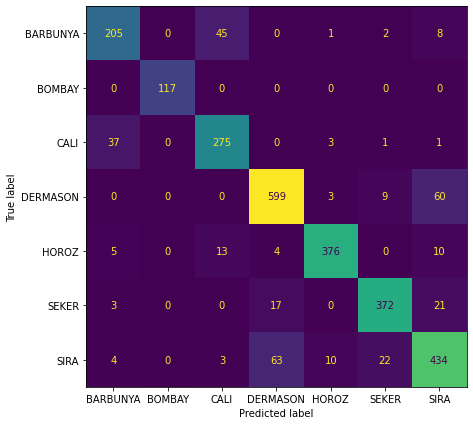

In [38]:
#confusion matrix
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred2),
    display_labels= enc.classes_
).plot(ax=ax, colorbar=False)

In [39]:
print(classification_report(y_test, ypred2, target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.81      0.79      0.80       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.82      0.87      0.84       317
    DERMASON       0.88      0.89      0.88       671
       HOROZ       0.96      0.92      0.94       408
       SEKER       0.92      0.90      0.91       413
        SIRA       0.81      0.81      0.81       536

    accuracy                           0.87      2723
   macro avg       0.88      0.88      0.88      2723
weighted avg       0.87      0.87      0.87      2723



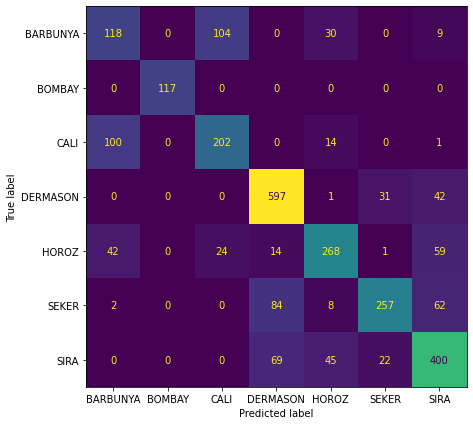

In [40]:
#confusion matrix
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred3),
    display_labels= enc.classes_
).plot(ax=ax, colorbar=False)

In [41]:
print(classification_report(y_test, ypred3, target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.45      0.45      0.45       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.61      0.64      0.62       317
    DERMASON       0.78      0.89      0.83       671
       HOROZ       0.73      0.66      0.69       408
       SEKER       0.83      0.62      0.71       413
        SIRA       0.70      0.75      0.72       536

    accuracy                           0.72      2723
   macro avg       0.73      0.71      0.72      2723
weighted avg       0.72      0.72      0.72      2723



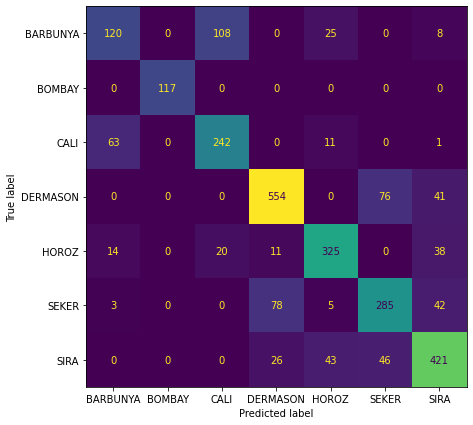

In [42]:
#confusion matrix
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred4),
    display_labels= enc.classes_
).plot(ax=ax, colorbar=False)

In [34]:
print(classification_report(y_test, ypred4, target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.60      0.46      0.52       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.65      0.76      0.70       317
    DERMASON       0.83      0.83      0.83       671
       HOROZ       0.79      0.80      0.80       408
       SEKER       0.70      0.69      0.70       413
        SIRA       0.76      0.79      0.77       536

    accuracy                           0.76      2723
   macro avg       0.76      0.76      0.76      2723
weighted avg       0.76      0.76      0.76      2723



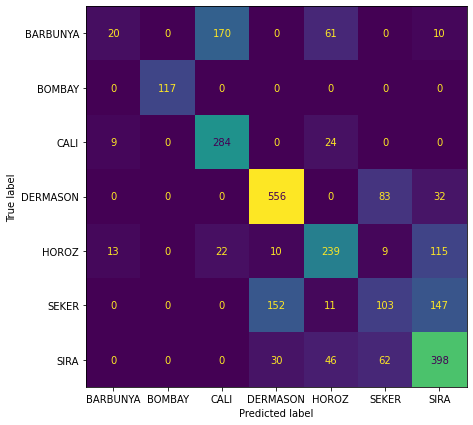

In [43]:
#confusion matrix
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred5),
    display_labels= enc.classes_
).plot(ax=ax, colorbar=False)

In [35]:
print("")
print(classification_report(y_test, ypred5, target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.48      0.08      0.13       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.60      0.90      0.72       317
    DERMASON       0.74      0.83      0.78       671
       HOROZ       0.63      0.59      0.61       408
       SEKER       0.40      0.25      0.31       413
        SIRA       0.57      0.74      0.64       536

    accuracy                           0.63      2723
   macro avg       0.63      0.63      0.60      2723
weighted avg       0.61      0.63      0.60      2723



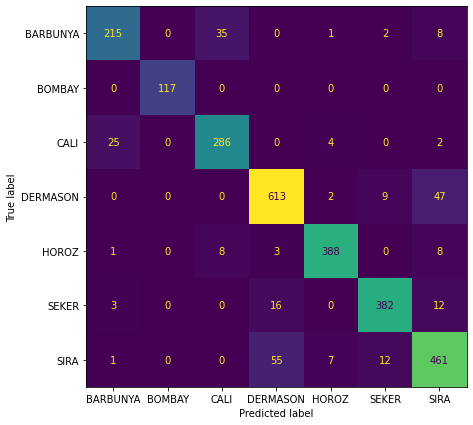

In [44]:
#confusion matrix
fig,ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, ypred6),
    display_labels= enc.classes_
).plot(ax=ax, colorbar=False)

In [36]:
print('')
print(classification_report(y_test, ypred6, target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.82      0.85       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.87      0.90      0.89       317
    DERMASON       0.89      0.91      0.90       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.94      0.92      0.93       413
        SIRA       0.86      0.86      0.86       536

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



In [46]:
# save the model, encoder
import joblib
joblib.dump(clf6, 'saved_model.pk1')
joblib.dump(enc, 'saved_encoder.pk1')

['saved_encoder.pk1']

In [58]:
def predict_input(data_dict):
    X_inp = pd.DataFrame([data_dict])
    clf = joblib.load('saved_model.pk1')
    enc = joblib.load('saved_encoder.pk1')
    y_pred = clf.predict(X_inp)
    return enc.inverse_transform(y_pred)[0] #bean class name 

In [59]:
#test the fuction
X.iloc[0].to_dict()


{'Area': 28395.0,
 'Perimeter': 610.291,
 'MajorAxisLength': 208.1781167,
 'MinorAxisLength': 173.888747,
 'AspectRation': 1.197191424,
 'Eccentricity': 0.549812187,
 'ConvexArea': 28715.0,
 'EquivDiameter': 190.1410973,
 'Extent': 0.763922518,
 'Solidity': 0.988855999,
 'roundness': 0.958027126,
 'Compactness': 0.913357755,
 'ShapeFactor1': 0.007331506,
 'ShapeFactor2': 0.003147289,
 'ShapeFactor3': 0.834222388,
 'ShapeFactor4': 0.998723889}

In [60]:
data = {'Area': 28395.0,
 'Perimeter': 610.291,
 'MajorAxisLength': 208.1781167,
 'MinorAxisLength': 173.888747,
 'AspectRation': 1.197191424,
 'Eccentricity': 0.549812187,
 'ConvexArea': 28715.0,
 'EquivDiameter': 190.1410973,
 'Extent': 0.763922518,
 'Solidity': 0.988855999,
 'roundness': 0.958027126,
 'Compactness': 0.913357755,
 'ShapeFactor1': 0.007331506,
 'ShapeFactor2': 0.003147289,
 'ShapeFactor3': 0.834222388,
 'ShapeFactor4': 0.998723889
 }

predict_input(data)

'DERMASON'

for App Interface Gradio

In [49]:


import gradio as gr

In [ ]:
ui = gr.